# Demand prediction baseline solution

Victor Kantor, xead.wl@gmail.com

In [1]:
import numpy as np

In [2]:
import pandas as pd

train = pd.read_csv("train.tsv")
test = pd.read_csv("test.tsv")
sample_submission = pd.read_csv("sample_submission.tsv")

In [59]:
train

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,0,123438,2012,52,1,20442076,4915.0,38056.0,40185.0,45733.0,...,39423.0,41765.0,52590.0,31452.0,44420.0,41865.0,52705.0,36102.0,44163.0,45239.0
1,1,58410,2012,52,1,20441997,2230.0,18817.0,20110.0,26368.0,...,22830.0,25230.0,27850.0,21390.0,27090.0,23170.0,29705.0,19140.0,22055.0,23200.0
2,2,163930,2012,52,1,20441990,5695.0,47480.0,47619.0,89708.0,...,14930.0,44290.0,46412.0,29320.0,21140.0,28406.0,65056.0,31886.0,48750.0,36520.0
3,3,53902,2012,52,1,20441989,1995.0,17146.0,20066.0,27070.0,...,15120.0,12480.0,19780.0,7990.0,8230.0,10650.0,21920.0,13040.0,9780.0,9630.0
4,4,105970,2012,52,1,20441988,6515.0,49262.0,50045.0,95167.0,...,18872.0,19328.0,37168.0,13570.0,19760.0,20208.0,34745.0,18442.0,24700.0,21793.0
5,5,21171,2012,52,1,20441953,445.0,3020.0,2395.0,4015.0,...,8796.0,7690.0,13448.0,3455.0,7205.0,8490.0,10790.0,7855.0,8150.0,7505.0
6,6,63128,2012,52,1,20441952,445.0,3930.0,4260.0,6836.0,...,11754.0,8064.0,15275.0,4991.0,9025.0,12236.0,19830.0,8465.0,10770.0,13145.0
7,7,44001,2012,52,1,20441951,1167.0,15220.0,12310.0,17270.0,...,21102.0,20376.0,25385.0,11685.0,21389.0,16685.0,22805.0,14495.0,16462.0,19383.0
8,8,53202,2012,52,1,20441790,1640.0,22010.0,17716.0,21941.0,...,18301.0,17758.0,26181.0,11090.0,17705.0,17225.0,23385.0,13711.0,17175.0,22406.0
9,9,36627,2012,52,1,20441789,1440.0,14601.0,12127.0,17498.0,...,13531.0,15015.0,18574.0,9146.0,14865.0,13051.0,17389.0,10739.0,13260.0,15570.0


In [58]:
test

,Num,year,week,shift,item_id,f1,f2,f3,f4,f5,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,348622,2015,3,3,20447918,960.0,820.0,1128.0,1801.0,1045.0,...,1510.0,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0
1,348623,2015,3,3,20447902,9086.0,12585.0,11595.0,9685.0,12917.0,...,22055.0,14235.0,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0
2,348624,2015,3,3,20447732,115087.0,147287.0,176065.0,143105.0,202069.0,...,302165.0,162232.0,221622.0,256605.0,240047.0,236630.0,206697.0,245652.0,286179.0,285904.0
3,348625,2015,3,3,20443951,20900.0,24420.0,27068.0,20460.0,25580.0,...,39055.0,14445.0,22450.0,22093.0,31175.0,23355.0,15358.0,18930.0,29643.0,33970.0
4,348626,2015,3,3,20443944,4430.0,5864.0,3310.0,1853.0,2836.0,...,120.0,130.0,60.0,30.0,50.0,20.0,20.0,30.0,0.0,0.0
5,348627,2015,3,3,20443943,57289.0,80036.0,112511.0,116002.0,171900.0,...,122340.0,50368.0,94634.0,91999.0,119165.0,96190.0,88666.0,118744.0,132368.0,117730.0
6,348628,2015,3,3,20443941,21868.0,30620.0,45886.0,49732.0,75195.0,...,77370.0,40930.0,63143.0,61417.0,63957.0,43027.0,53260.0,58029.0,62126.0,71857.0
7,348629,2015,3,3,20443902,41105.0,57637.0,54540.0,68171.0,64825.0,...,102330.0,36506.0,43432.0,52948.0,57199.0,60984.0,44887.0,58033.0,98839.0,76432.0
8,348630,2015,3,3,20443901,39381.0,56933.0,59899.0,67243.0,58880.0,...,106168.0,37908.0,45296.0,53534.0,58892.0,61250.0,54951.0,62347.0,106921.0,84194.0
9,348631,2015,3,3,20443308,5922.0,16070.0,14665.0,10640.0,20150.0,...,4081.0,1660.0,1610.0,2190.0,1464.0,1720.0,20460.0,1650.0,2568.0,1902.0


In [3]:
def smape(y_pred, y_true):
    assert(len(y_pred) == len(y_true))
    numerator = abs(y_pred - y_true)
    denomerator = (abs(y_pred) + abs(y_true)) / 2
    ans = (100.0 / len(y_pred)) * np.sum(numerator / denomerator)
    return ans

In [4]:
col_params = ['Num', 'y', 'f1', 'f10', 'f20', 'f34', 'f29', 'f5', 'f59', 'f50']

frac = 0.1 # fraction of learning examples used for model fitting

# sample the train set if your don't want to deel with all examples
train_sampled = train.sample(frac=frac)
# train_sampled = train_sampled[col_params]

X = train_sampled.drop(['Num','y'], axis=1)
y = train_sampled['y']
print len(X), len(y)

7246 7246


In [18]:
train.iloc[0]['y']

123438.0

In [26]:
import matplotlib.pyplot as plt

58410.0
max: 34995.0
mean: 24208.2333333
69990.0


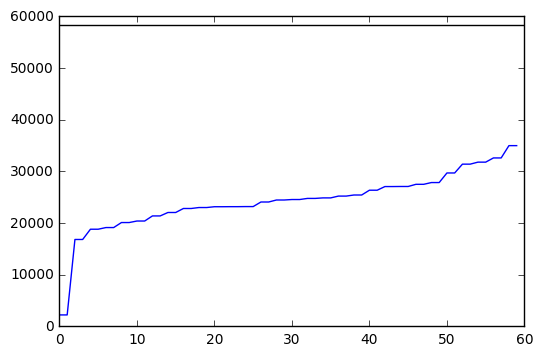

In [70]:
ii = 1

print(train.iloc[ii]['y'])

tmp = sorted(train.iloc[ii][6:].values)

print('max: {}'.format(max(tmp)))
print('mean: {}'.format(np.mean(tmp)))
print(max(tmp) * 2)

plt.plot(tmp)
plt.hlines(train.iloc[ii]['y'], 0, 60)
plt.show()

In [106]:
train_sampled.head()

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
17413,86271,1143568,2013,25,1,20438675,561820.0,687084.0,465227.0,598098.0,...,420970.0,479339.0,626898.0,520699.0,464593.0,641236.0,609264.0,661266.0,579520.0,445660.0
45527,224044,360363,2014,16,3,20438702,286152.0,319134.0,308345.0,314090.0,...,233432.0,246393.0,214965.0,234316.0,260142.0,259709.0,234857.0,195975.0,241628.0,231158.0
38169,187567,3904,2014,5,3,20427583,2860.0,2910.0,2610.0,3010.0,...,2030.0,3950.0,1743.0,2751.0,2339.0,3263.0,2785.0,3299.0,1512.0,1275.0
18689,93022,15216,2013,27,1,20441131,10875.0,13505.0,16595.0,28924.0,...,17080.0,11655.0,12565.0,13375.0,12935.0,15645.0,11520.0,7640.0,14970.0,14040.0
72279,349341,101930,2015,2,1,20442104,95644.0,92060.0,83785.0,87990.0,...,44032.0,66111.0,60944.0,64730.0,59859.0,57395.0,69781.0,74844.0,85658.0,15982.0


In [91]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=110, max_depth=12)
model.fit(X, y)

# preds = model.predict(test.drop(['Num'], axis=1))

# print len(preds)
# print len(sample_submission)

CPU times: user 54.1 s, sys: 331 ms, total: 54.4 s
Wall time: 54.9 s


# Just to Validate the trained Model

In [96]:
frac = 0.9
train_sampled = train.sample(frac=frac)
# train_sampled = train_sampled[col_params]

X_valid = train_sampled.drop(['Num','y'], axis=1)
y_valid = train_sampled['y']
print len(X_valid), len(y_valid)

smape(model.predict(X_valid), y_valid.values)

65211 65211


ValueError: Number of features of the model must match the input. Model n_features is 8 and input n_features is 64 

In [107]:
from xgboost import XGBRegressor

# THIS is the Top model

# fit model no training data
model_xg = xgboost.XGBRegressor(max_depth=20)
model_xg.fit(X, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=20,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [108]:
# make predictions for test data
smape(model_xg.predict(X_valid), y_valid.values)

7.1151518160474749

In [109]:
preds = model_xg.predict(test.drop(['Num'], axis=1))
print len(preds)
print len(sample_submission)

2016
2016


In [85]:
frac = 0.1
train_sampled = train.sample(frac=frac)
train_sampled = train_sampled[col_params]
X_gb = train_sampled.drop(['Num','y'], axis=1)
y_gb = train_sampled['y']

In [86]:
model_xg_2 = xgboost.XGBRegressor(max_depth=20, reg_alpha=0.01, reg_lambda=5, min_child_weight=4)
model_xg_2.fit(X_gb, y_gb)
smape(model_xg_2.predict(X_valid), y_valid.values)

37.042437807250771

In [110]:
sample_submission['y'] = preds

In [111]:
sample_submission.head(5)

,Num,y
0,348622,2434.856934
1,348623,23929.835938
2,348624,305162.500000
3,348625,35573.277344
4,348626,20.824183


In [112]:
# In GBM you can get some negative predictions:
print sample_submission[sample_submission['y'] < 0]

Empty DataFrame
Columns: [Num, y]
Index: []


In [113]:
sample_submission['y'] = sample_submission['y'].map(lambda x: x if x > 0 else 0.0)

In [114]:
sample_submission.to_csv("baseline_submission.tsv", sep=',', index=False)